The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


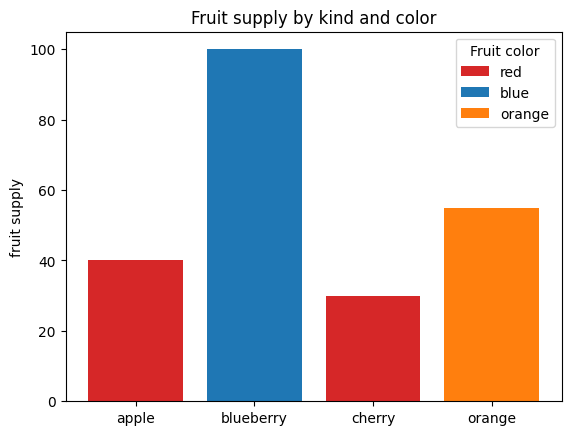

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.savefig('graph.eps', format='eps', dpi=1200)

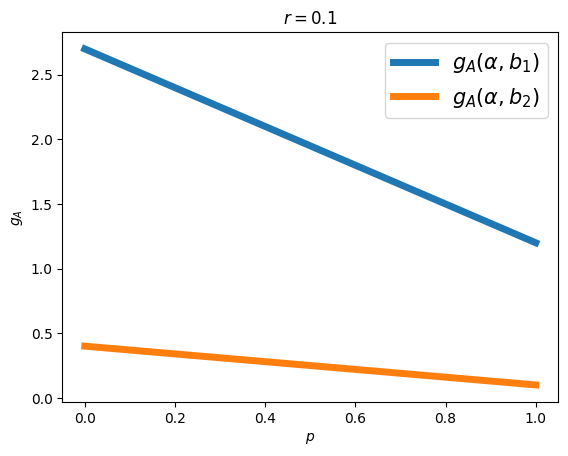

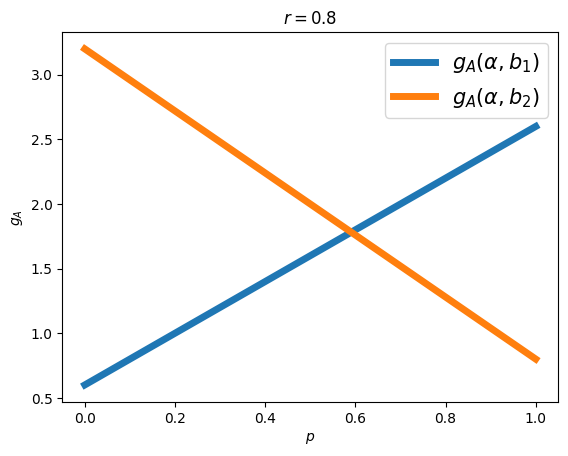

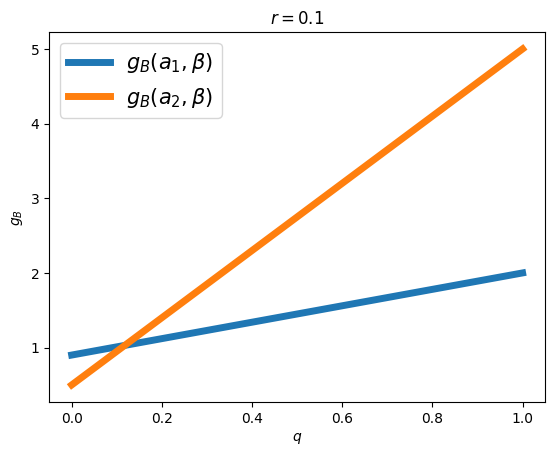

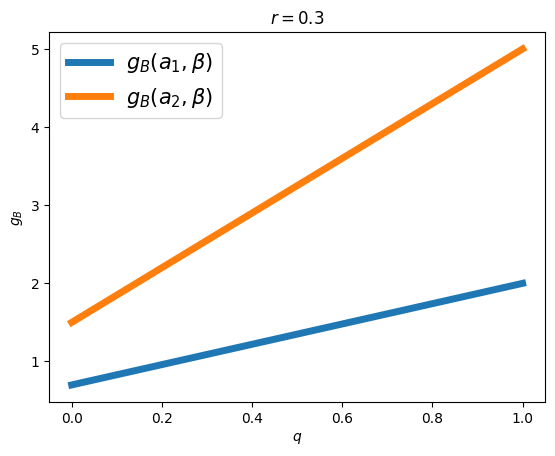

In [2]:
def graph_line(plt, p, q):
    px, py = p
    qx, qy = q

    plt.plot((px,qx), (py,qy), linestyle="solid", linewidth=5)


def graph_A(plt, r):
    graph_line(plt, (0,3-3 * r), (1, 2*r + 1)) # )
    graph_line(plt, (0, 4*r), (1, r)) # g_{A}(\alpha,b_{2})
    plt.xlabel(r'$p$')
    plt.ylabel(r'$g_A$')
    plt.title(r'$r = ' + str(r) +r'$')
    plt.legend([r'$g_{A}(\alpha,b_{1})$',r'$g_{A}(\alpha,b_{2})$'], fontsize="15")

def graph_B(plt, r):
    graph_line(plt, (0,1 - r), (1, 2)) # g_{B}(a_{1},\beta)
    graph_line(plt, (0, 5 *r), (1, 5)) # g_{B}(a_{2},\beta)
    plt.xlabel(r'$q$')
    plt.ylabel(r'$g_B$')
    plt.title(r'$r = ' + str(r) + r'$')
    plt.legend([r'$g_{B}(a_{1},\beta)$',r'$g_{B}(a_{2},\beta)$'], fontsize="15")


rsa = [0.1, 0.8]
rsb = [0.1, 0.3]


for r in rsa:
    graph_A(plt, r)
    plt.savefig(f'graphics/A_threat_point_finding_{round(r,3)}.svg', format='svg', dpi=1200)
    plt.show()

for r in rsb:
    graph_B(plt, r)
    
    plt.savefig(f'graphics/B_threat_point_finding_{round(r,3)}.svg', format='svg', dpi=1200)
    plt.show()

In [40]:

from scipy.spatial import ConvexHull

import numpy as np

def Y(r):
    return np.array((1+2*r,2))

def Z(r):
    return np.array((4*r,5*r))

def X(r):
    return np.array((3-3*r, 5))

def W(r):
    return np.array((r,1-r))

def graph_bargaining_set(plt, r, offsets=[(0,0),(0,0),(0,0),(0,0)]):
    graph_convex_hull(plt, np.array([X(r),Y(r),Z(r),W(r)]), offsets)
    plt.xlabel(r'$g_A$')
    plt.ylabel(r'$g_B$')
    plt.title(r'r = ' + str(r))
    # return plt

def threat_point(r):
    if r > 3/7:
        return np.array(((11 * r * r + r)/(8 * r - 2), 2))
    else:
        return np.array((4*r, 2))

def graph_threat_point(plt, r, xmax, ymax, lines=True,  offset=(0,0)):
    color = "blue"
    if threat_point(r)[0] < plt.xlim()[0] or threat_point(r)[1] < plt.ylim()[0]:
        return 
    plt.plot(*threat_point(r), 'X', color=color, clip_on=False)
    offset_comb = np.array((0.05, 0.15)) + offset
    #print("Old Offest", offset_comb)
    #new_offset = get_offset(plt, offset_comb)
    #print("Offset: ", new_offset)
    plt.annotate(r'$\tau$',(threat_point(r) + offset_comb), color=color)
    if lines:
        plt.plot((threat_point(r)[0],threat_point(r)[0]), (threat_point(r)[1],ymax), "--", color=color, alpha=0.5)
        plt.plot((threat_point(r)[0],xmax), (threat_point(r)[1],threat_point(r)[1]), "--", color=color, alpha=0.5)

def get_size(plt):
    bottom, top = plt.gca().get_ylim()
    left, right = plt.gca().get_xlim()
    #print(bottom, top, left, right)
    return (right-left, top-bottom)


def graph_equilibrium(plt, r, point, label):
    color = "firebrick"
    if threat_point(r)[0] < plt.xlim()[0] or threat_point(r)[1] < plt.ylim()[0]:
        return 
    plt.plot(*point, 'D' ,color=color, clip_on=False)
    plt.annotate(label,np.array(point) + (0.05, 0.05), color=color)
    plt.plot((point[0], point[0]), (threat_point(r)[1]+0.05, point[1]),  "-", linewidth=3,color=color, alpha=1)


def get_offset(plt, orig_offset):
    orig_y_size = 7
    orig_x_size = 5
    x_size, y_size = get_size(plt)
    #print(x_size)
    #print(y_size)
    x_scale = x_size/orig_x_size
    y_scale = y_size/orig_y_size
    x, y = orig_offset
    return np.array((x * x_scale, y * y_scale))


def graph_convex_hull(plt, points, offsets=[(0,0),(0,0),(0,0),(0,0)], labels=['X','Y','Z','W']):
    hull = ConvexHull(points)
    
    for i in range(len(labels)):
        label = labels[i]
        point = points[i]
        offset = offsets[i]


        if point[0] < plt.xlim()[0] or point[1] < plt.ylim()[0]:
            continue
        else:
            plt.plot(point[0], point[1], 'o', color="black", clip_on=False)
            offset = np.array((-0.05,0.2)) + offset
            #new_offset = get_offset(plt, offset)
            plt.annotate(label, point + offset)
    
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], '-', color="black")
        plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="orange")
    # return plt


def frontier_graph_bargaining_set(plt, r, frontier_points, frontier_hulls, offsets=[(0,0),(0,0),(0,0),(0,0)]):
    frontier_graph_convex_hull(plt, np.array([X(r),Y(r),Z(r),W(r)]), frontier_points, frontier_hulls, offsets)
    plt.xlabel(r'$g_A$')
    plt.ylabel(r'$g_B$')
    plt.title(r'r = ' + str(r))


def frontier_graph_convex_hull(plt, points, frontier_points, frontier_hulls, offsets=[(0,0),(0,0),(0,0),(0,0)], labels=['X','Y','Z','W']):
    """
    Frontier portions are the indexes of the 
    """
    hull = ConvexHull(points)
    
    
    
    for i in range(len(hull.simplices)):
        simplex = hull.simplices[i]
        if i in frontier_hulls:
            color = "darkviolet"
            style = "solid"
            width = 3
        else:
            color= "black"
            style = "solid"
            width = 1
        plt.plot(points[simplex, 0], points[simplex, 1], linestyle=style, linewidth=width, color=color)
        plt.fill(points[hull.vertices,0], points[hull.vertices,1], alpha=0.1, color="orange")

    for i in range(len(labels)):
        label = labels[i]
        point = points[i]
        offset = offsets[i]
        if i in frontier_points:
            color = "darkviolet"
            gen = 's'
        else:
            color = "black"
            gen = 'o'
        
        print(point[0], point[1])
        print("Limits:", plt.xlim()[0], plt.ylim()[0])
        if point[0] < plt.xlim()[0] or point[1] < plt.ylim()[0]:
            continue
        else:
            print("yay")
            plt.plot(point[0], point[1], gen, color=color, clip_on=False)
            old_offset = np.array((-0.05,0.2)) + offset
            #print(label)
            #print(offset)
            #print("Old Offest", old_offset)
            # new_offset = get_offset(plt, old_offset)
            #print("Offset: ", new_offset)
            plt.annotate(label, point + old_offset, color=color)
    # return plt

# Need to pick points and lines to colour.



#plt = graph_convex_hull(plt, np.array([[0,0],[4,1],[1,1],[1,0], [1,0.4]]))

TypeError: bad operand type for unary +: 'tuple'

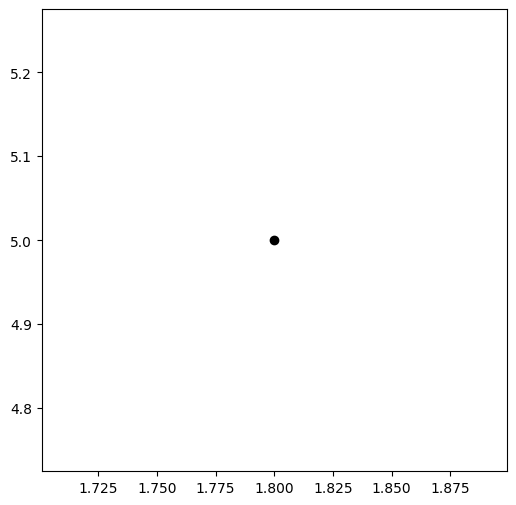

In [4]:
import matplotlib.pyplot as plt

r = 0.4
plt.rcParams["figure.figsize"] = (6,6)
graph_bargaining_set(plt,r, [(0.1,-0.5),(0,0),(0,0),(0.1, 0.1)])
plt.show()


1.7999999999999998 5.0
1.8 2.0
1.6 2.0
0.4 0.6


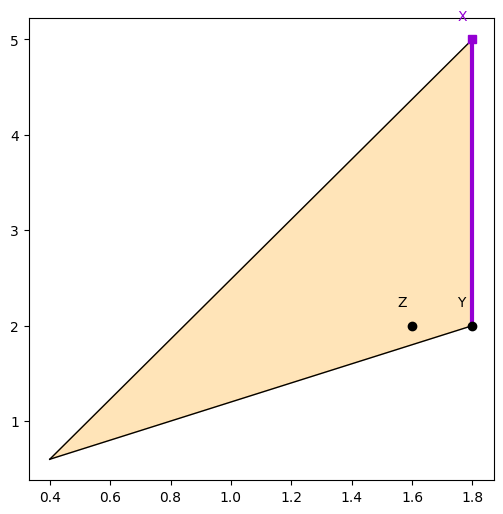

In [ ]:
import matplotlib.pyplot as plt

frontier_graph_convex_hull(plt, np.array([X(r),Y(r),Z(r),W(r)]), (0,), (2,))


In [ ]:
a = np.array([1,2,3,4])
fp = [1,2]

np.delete(a, fp)

array([1, 4])

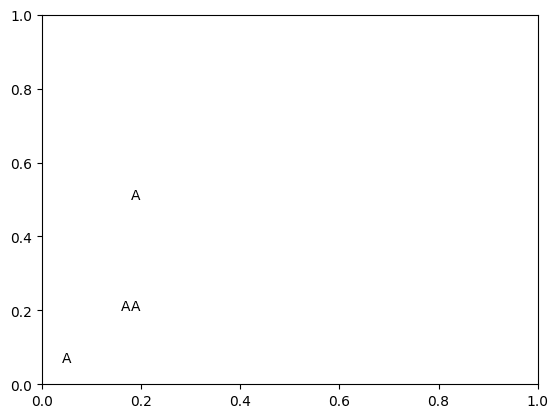

In [ ]:
r = 0.4
points = np.array([X(r),Y(r),Z(r),W(r)])
# plt.text(points[:,0], points[:,1], "X", fontsize=9)
ax = plt.gca()
for point in points:
    ax.annotate('A', point/10)
plt.show()

1


C:\Users\akesh\AppData\Local\Temp\ipykernel_3228\119040406.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="orange")


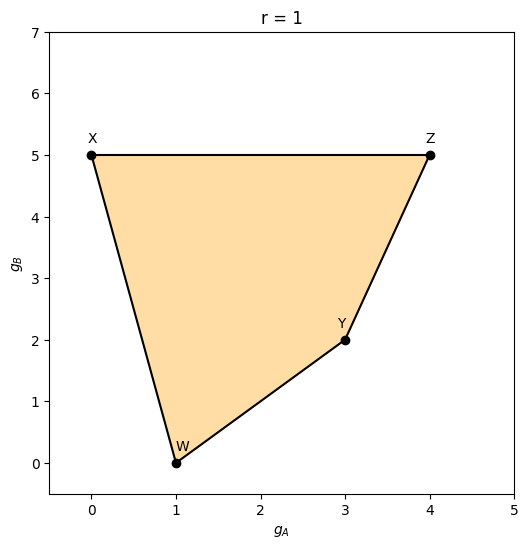

In [67]:
rs = [0, 0.1, 0.2, 0.33, 0.4, 0.5, 0.47, 0.78, 1]
offsets = [
    [(0,0.01), (0.1,0), (-0.2,0), (-0.1,0.1)], 
    [(0,0),(0,0),(0,0),(0,0)],
    [(0,0),(-0.1,0),(-0.1,0),(-0.1,0)],
    [(0,0),(-0.1,0),(0,0),(-0.1,0)],
    [(0,0),(0.1,0),(0,0),(-0.1,0)],
    [(0,0),(0.1,0),(0.1,0),(-0.1,0)],
    [(0,0),(0.1,0),(0.1,0),(-0.1,0)],
    [(0,0),(-0.05,0),(0,0),(-0.18,0)],
    [(0,0),(-0.05,0),(0,0),(0.05,0)],
]


for r, offset in zip(rs, offsets):
    if r not in [1]:
        continue
    
    plt.rcParams["figure.figsize"] = (6,6)
    xmax = 5
    ymax = 7
    plt.xlim(-0.5, xmax)
    plt.ylim(-0.5, ymax)
    print(r)
    # print(threat_point(r))
    graph_bargaining_set(plt, r, offset)
    
    plt.savefig(f'graphics/graph_{round(r,3)}.svg', format='svg', dpi=1200)
    plt.show()

0
[0 2]


C:\Users\akesh\AppData\Local\Temp\ipykernel_6480\2185498289.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="orange")


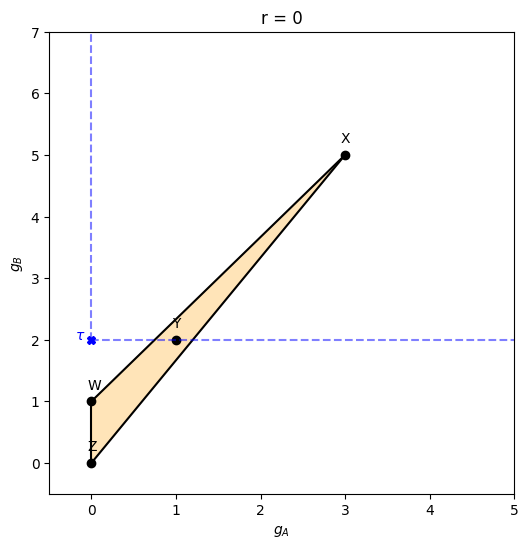

0.4
[1.6 2. ]


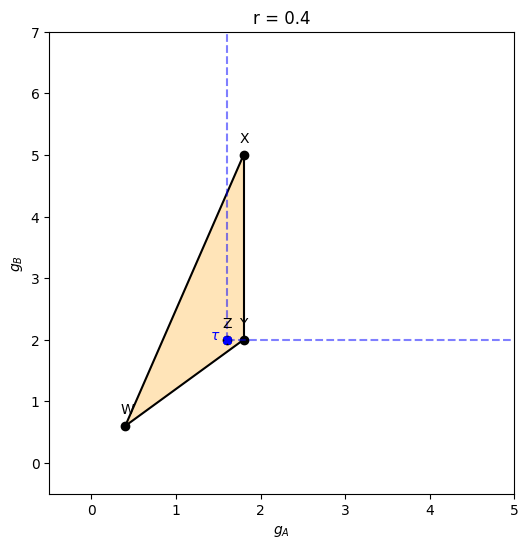

0.42857142857142855
[1.71428571 2.        ]


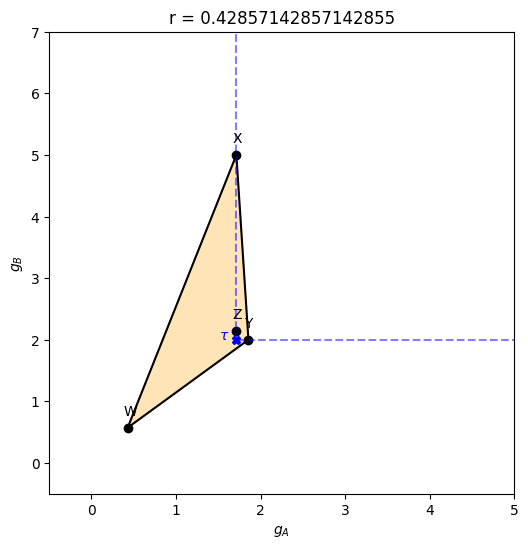

0.47
[1.64767045 2.        ]


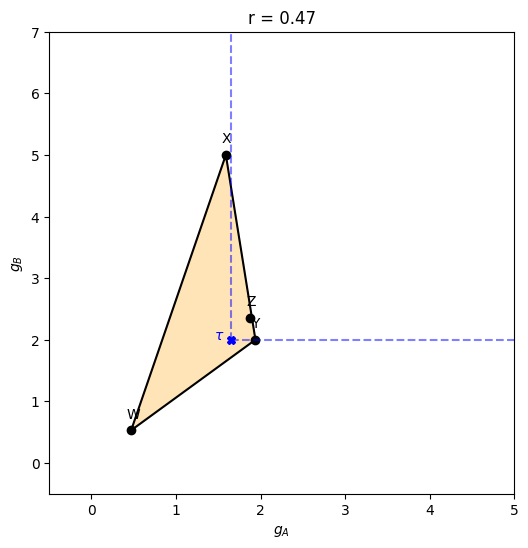

0.5
[1.625 2.   ]


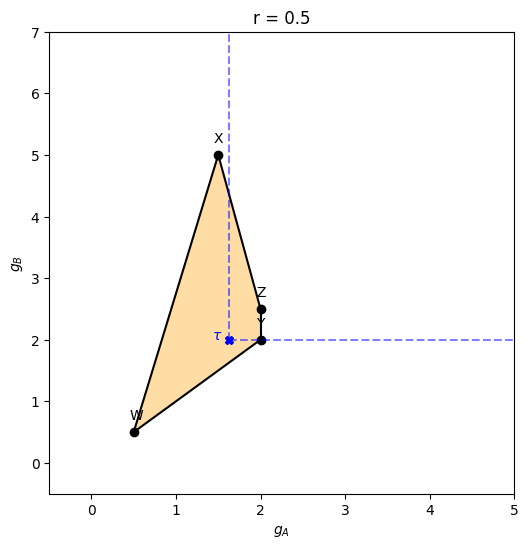

0.78
[1.76235849 2.        ]


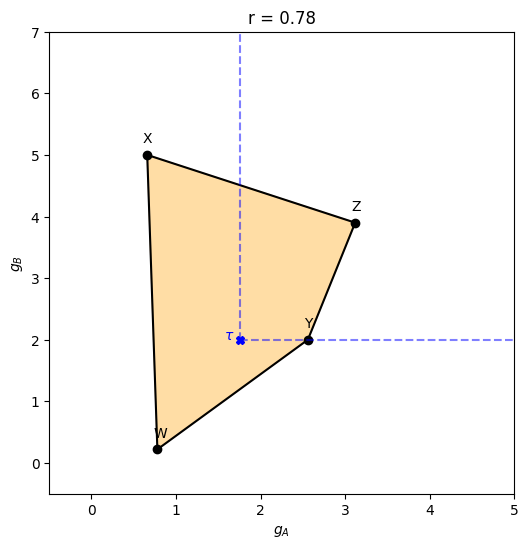

1
[2. 2.]


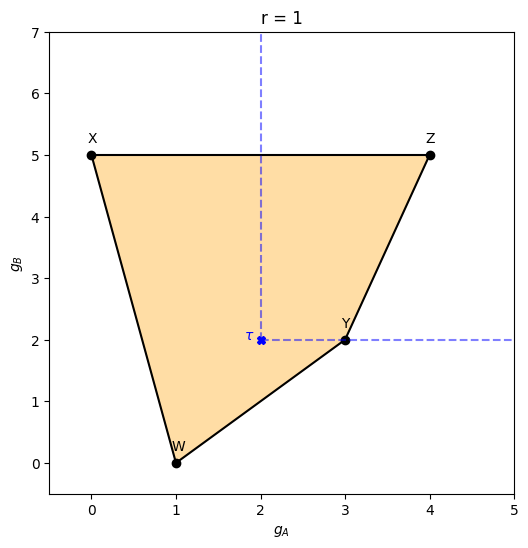

In [ ]:
rs = [0, 0.4, 3/7, 0.47, 0.5, 0.78, 1]

for r in rs:
    plt.rcParams["figure.figsize"] = (6,6)
    xmax = 5
    ymax = 7
    plt.xlim(-0.5, xmax)
    plt.ylim(-0.5, ymax)
    print(r)
    print(threat_point(r))
    graph_bargaining_set(plt, r)
    graph_threat_point(plt, r,xmax, ymax)
    
    #plt.show()
    plt.savefig(f'graphics/graph_threat_{round(r,3)}.svg', format='svg', dpi=1200)
    plt.show()
    

0
[0 2]


C:\Users\akesh\AppData\Local\Temp\ipykernel_6808\279180508.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="orange")


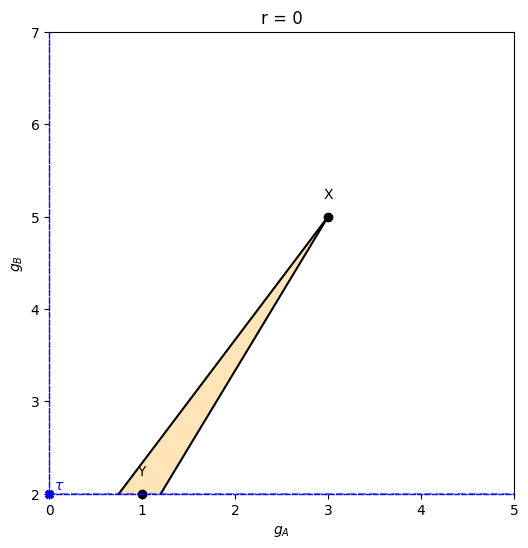

0.4
[1.6 2. ]


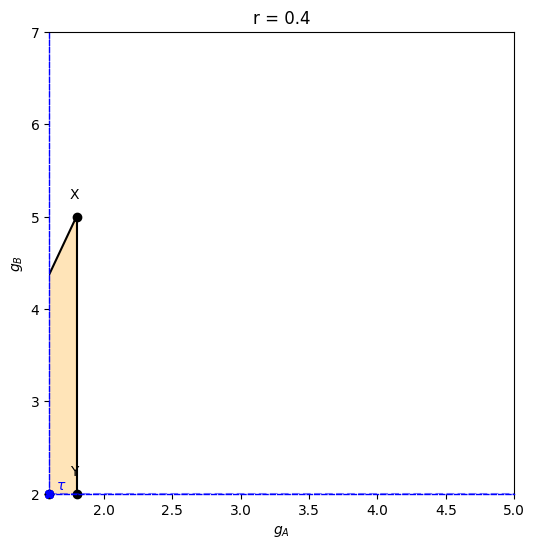

0.42857142857142855
[1.71428571 2.        ]


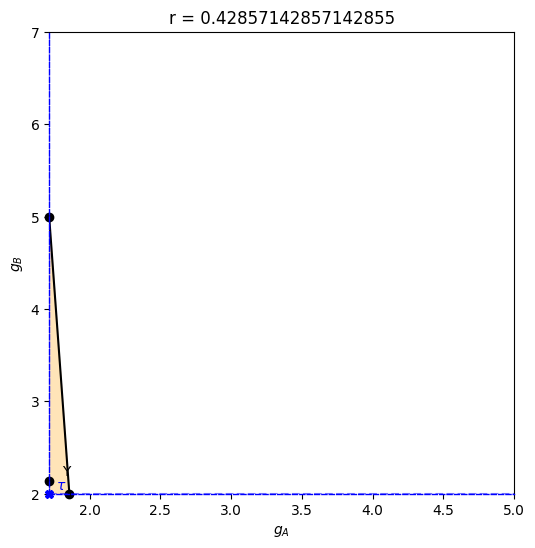

0.47
[1.64767045 2.        ]


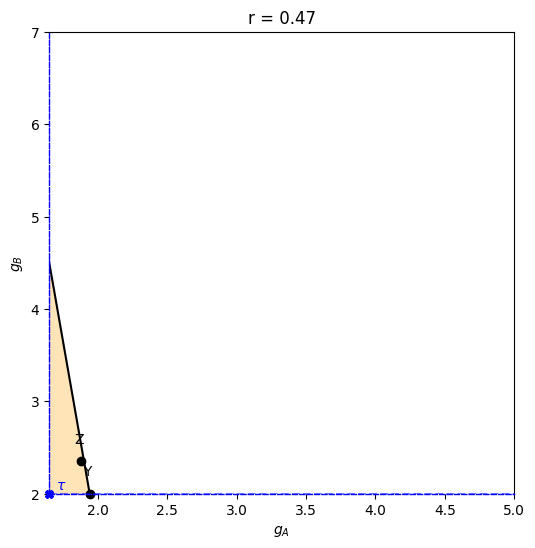

0.49
[1.63078125 2.        ]


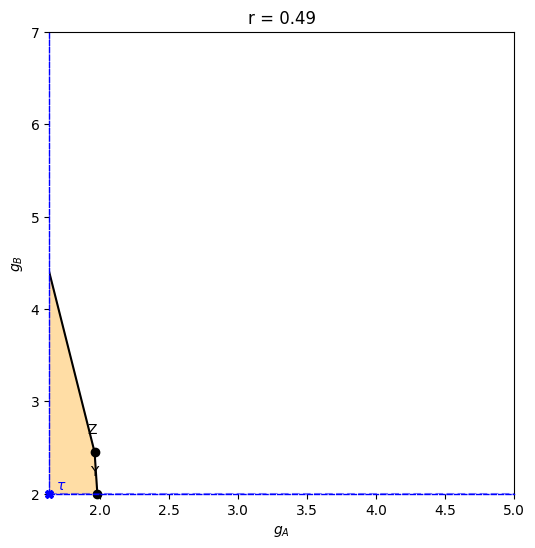

0.5
[1.625 2.   ]


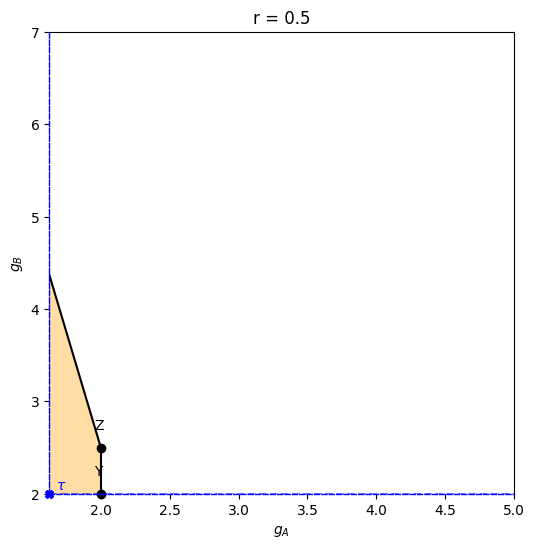

0.78
[1.76235849 2.        ]


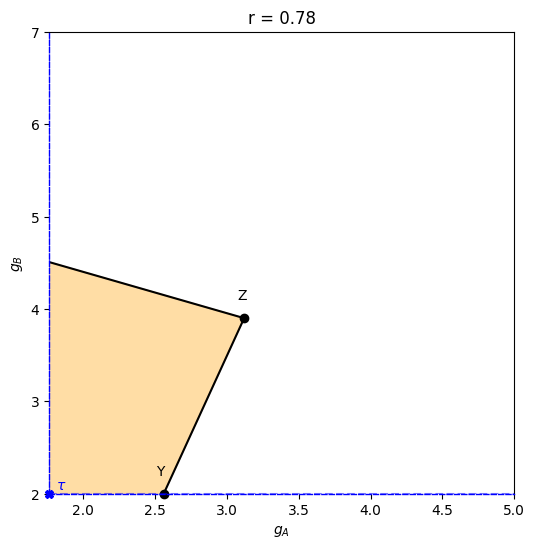

1
[2. 2.]


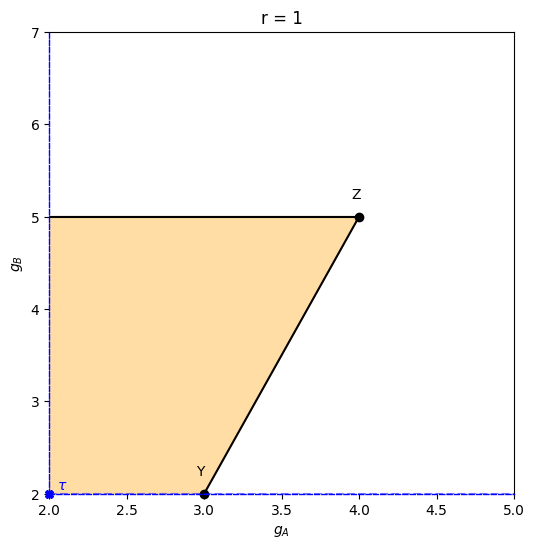

In [ ]:
rs = [0, 0.4, 3/7, 0.47, 0.49, 0.5, 0.78, 1]

for r in rs:
    plt.rcParams["figure.figsize"] = (6,6)
    fig, ax = plt.subplots(1,1)

    xmax = 5
    ymax = 7
    plt.xlim(threat_point(r)[0], xmax)
    plt.ylim(threat_point(r)[1], ymax)
    print(r)
    print(threat_point(r))
    graph_bargaining_set(plt, r)
    graph_threat_point(plt, r,xmax, ymax)

        
    ax.spines['bottom'].set_color('blue')
    ax.spines['left'].set_color('blue')
    ax.spines['bottom'].set_linestyle('dashed')
    ax.spines['left'].set_linestyle('dashed')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    
    #plt.show()
    plt.savefig(f'graphics/graph_threat_zoom_{round(r,3)}.svg', format='svg', dpi=1200)
    plt.show()
    

0
1
0.4
0.6
0.42857142857142855
0.5714285714285714
0.47
0.53
0.49
0.51
0.5
0.5
0.78
0.21999999999999997
0.63
0.37
1
0
1
(2,)
(0,)
0 5
Limits: 2.0 2.0
3 2
Limits: 2.0 2.0
yay
4 5
Limits: 2.0 2.0
yay
1 0
Limits: 2.0 2.0


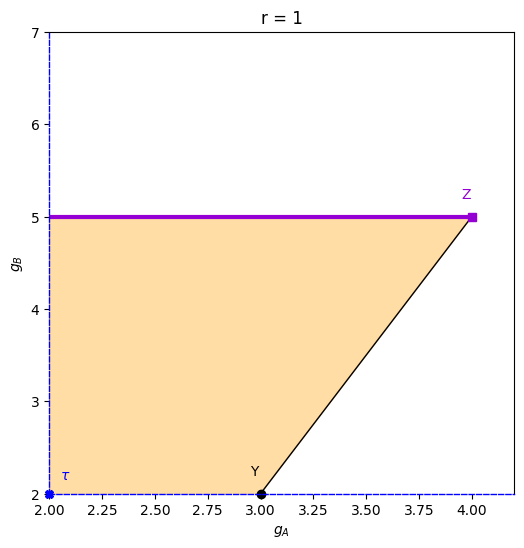

In [38]:
import matplotlib.pyplot as plt

rs = [0, 0.4, 3/7, 0.47, 0.49, 0.5, 0.78, 0.63, 1]
fp = [(0,),(0,),(0,1),(1,),(0,1,2,3),(2,),(2,), (2,), (2,)]
fh = [(),(),(2,),(2,),(0,2,1,3),(1,3),(0,), (1,), (0,)]
offsets = [
    [(0,0.01), (0,-0.1), (0,2), (200,200)], 
    [(0.035,0),(0.035,0),(0,0),(0,0)],
    [(0.055,0),(0.055,0),(0.055,0),(1,0)],
    [(0,0),(0.04,0),(0.03,-0.1),(0,0)],
    [(0,0),(0.06,0),(0.06,0),(0,0)],
    [(0,0),(0.06,0),(0.06,0),(0,0)],
    [(0,0),(0,0),(0,0),(0,0)],
    [(0,0),(0,0),(0,0),(0,0)],
    [(0,0),(0,0),(0,0),(0,0)],
    [(0,0),(0,0),(0,0),(0,0)],
    [(0,0),(0,0),(0,0),(0,0)],
]
toffsets = [
    (0,0),
    (-0.042,0),
    (-0.045,0),
    (-0.042,0),
    (-0.04,0),
    (-0.04,0),
    (0,0),
    (0,0),
    (0,0),
    (0,0),
    (0,0),
    (0,0),
]

r_fix = 1

for r, fp, fh, offset, toffset in zip(rs, fp, fh, offsets, toffsets):
    print(r)
    print(abs(r-r_fix))
    if abs(r-r_fix) > 0.001:
        continue
    plt.rcParams["figure.figsize"] = (6,6)
    fig, ax = plt.subplots(1,1)
    xmax = 5
    ymax = 7
    print(r)
    print(fp)
    print(fh)
    plt.xlim(left=threat_point(r)[0], right=100000) # Pain; to prevent reversing axis
    plt.ylim(threat_point(r)[1], ymax)
    frontier_graph_bargaining_set(plt, r, fp, fh, offset)
    graph_threat_point(plt,r,xmax,ymax,False,toffset)
    plt.autoscale(axis='x')
    plt.xlim(left=threat_point(r)[0])
    #plt.show()

    # Can't do annotations until I know size, and can't get size until I've plotted everything. 
    
    
    

    ax.spines['bottom'].set_color('blue')
    ax.spines['left'].set_color('blue')
    ax.spines['bottom'].set_linestyle('dashed')
    ax.spines['left'].set_linestyle('dashed')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)

    plt.savefig(f'graphics/frontier_graph_threat_zoom_{round(r,3)}.svg', format='svg', dpi=1200)
    plt.show()
